# Tutorial week 8 - Neural Networks

#### After installing TensorFlow (see instructions in 6COSC020W_TutorialWeek8.pdf), run the following code and answer the 5 questions. Then try the 8 exercises described at the end.
#### 1) Download MNIST dataset

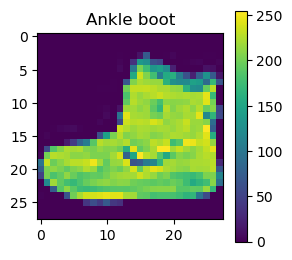

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

seed = 123 # to ensure we always get the same results
np.random.seed(seed) # to ensure we always get the same results
tf.keras.utils.set_random_seed(seed) # to ensure we always get the same results

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(3, 3))
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

#### **Question 1: How many images do you have in the training dataset and the in the testing dataset?**

<font color='red'>**SOLUTION**: 60,000 in training and 10,000 in testing (see code below)</font>

In [2]:
# Add code here to answer the question
print('Number of images in training: ' + str(len(train_images)))
print('Number of images in testing: ' + str(len(test_images)))


Number of images in training: 60000
Number of images in testing: 10000


#### **Question 2: How many images do you have for each class in the training dataset? Is it a balanced dataset?**

<font color='red'>**SOLUTION**: It is a balanced dataset because we have the same number of samples in each class (see code below).</font>

In [3]:
# Add code here to answer the question
for i in range(len(class_names)):
    print(class_names[i] + ': ' + str(np.count_nonzero(train_labels == i)))


T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


#### 2) Display some images from the train dataset

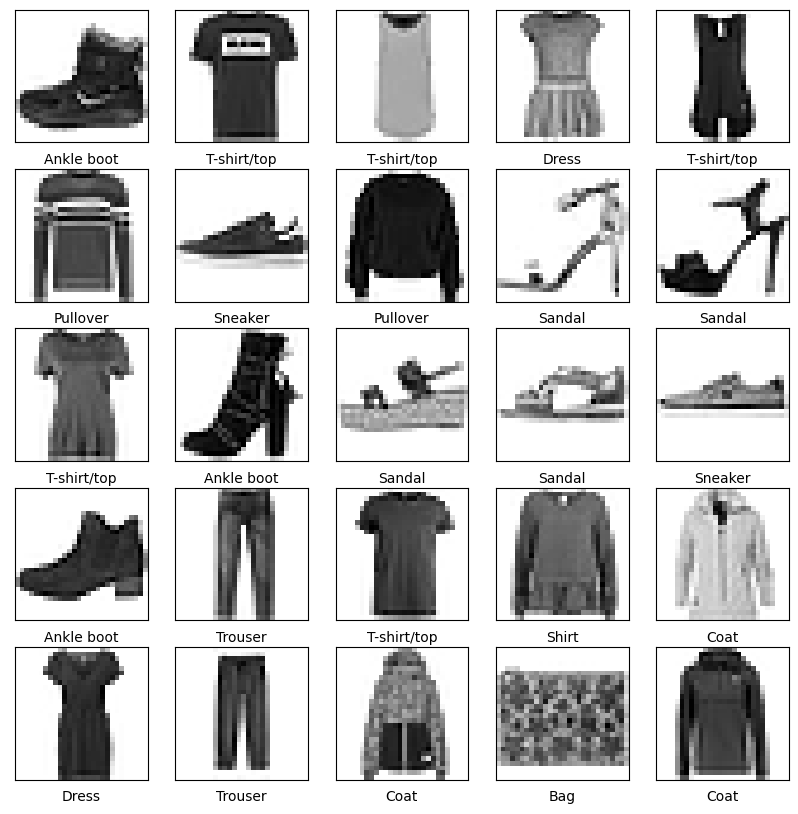

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### 3) Create a neural network with Tensorflow with 2 Dense layers 

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'), # number of units = 128
    tf.keras.layers.Dense(10) # number of outputs = 10 (10 classess)
])

#### 4) Compile the model. Use Adam optimiser, and a loss function SparseCategoricalCrossentropy

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### 5) Train the model

In [7]:
epochs = 10
history = model.fit(train_images, train_labels, validation_data=[test_images, test_labels], epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.8848 - accuracy: 0.7052 - val_loss: 0.9086 - val_accuracy: 0.7552
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6856 - accuracy: 0.7663 - val_loss: 0.6820 - val_accuracy: 0.7778
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6015 - accuracy: 0.7839 - val_loss: 0.6176 - val_accuracy: 0.7969
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5543 - accuracy: 0.8056 - val_loss: 0.5772 - val_accuracy: 0.8124
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5097 - accuracy: 0.8230 - val_loss: 0.5756 - val_accuracy: 0.8115
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4996 - accuracy: 0.8284 - val_loss: 0.5209 - val_accuracy: 0.8267
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4928 - accuracy: 0.8315 - val_loss: 0.5948 - val_accuracy:

#### 6) Evaluate the model

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5738 - accuracy: 0.8111 - 390ms/epoch - 1ms/step

Test accuracy: 0.8111000061035156


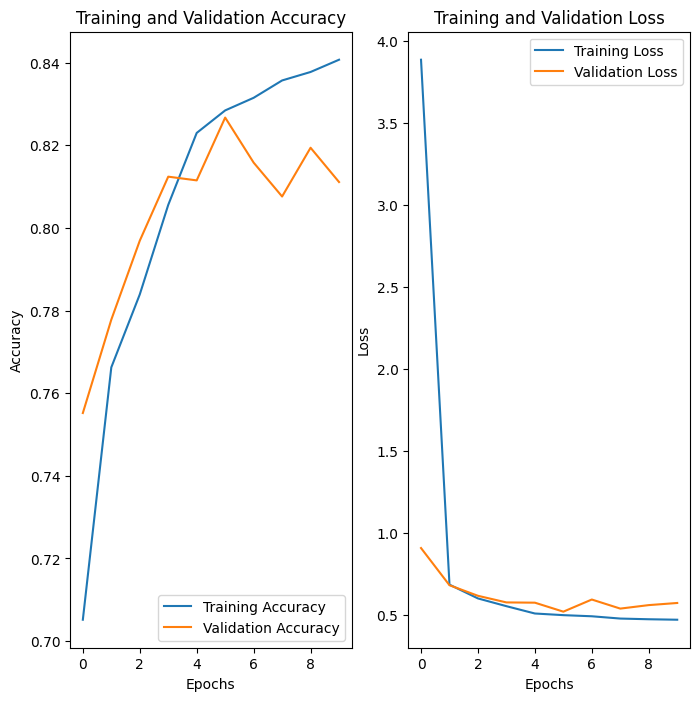

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### **Question 3: Is the validation accuracy higher or lower than the training accuracy at epoch 10? Why?**

<font color='red'>**SOLUTION**: The validation accuracy is lower. During training the model only sees the training images, therefore the accuracy on the training dataset is often higher. During training the model does not see the images in the validation dataset. The validation dataset is used to get an estimate on the accuracy with new data.</font>

#### **Question 4: Looking at the plot, do you think the accuracy could be improved? What would happen if we increase the number of epochs?**

<font color='red'>**SOLUTION**: Yes, increasing the number of epochs it is likely to improve the accuracy.</font>

#### 7) Get probabilities. For each test image will tell us the probability to belong to each of the 10 classes (i.e., for each test image will output an array of 10 values).
Since our model returns the logits, we add a Softmax layer in order to convert logits to probabilities.

In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
probabilities = probability_model.predict(test_images)
print('Size of variable probabilities: ' + str(probabilities.shape)) # You can see the size of the arrays here (10000, 10)
print('Probabilities:')
print(probabilities) # Returns an array of 10000 arrays with 10 probabilities each (one for each class)

313/313 [==============================] - 0s 884us/step
Size of variable probabilities: (10000, 10)
Probabilities:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.14005150e-02
  1.22770620e-23 9.77085710e-01]
 [9.77417338e-04 9.09770441e-14 9.94042575e-01 ... 0.00000000e+00
  1.28275035e-08 0.00000000e+00]
 [2.11419683e-06 9.99997854e-01 1.50227445e-15 ... 0.00000000e+00
  3.40524982e-12 0.00000000e+00]
 ...
 [1.16487714e-02 1.76173654e-14 2.37325423e-07 ... 5.01251032e-26
  9.79921699e-01 7.50633398e-15]
 [2.55199877e-04 9.99737561e-01 2.07363848e-10 ... 0.00000000e+00
  3.75431952e-08 0.00000000e+00]
 [4.20795598e-22 6.43166167e-36 1.31208521e-29 ... 1.24593247e-02
  8.79638435e-07 4.80550170e-06]]


#### 8) Get predicted class
For each image, we have a vector of 10 probabilities (1 for each possible class) that tells us the probability that that image belongs to the class. We now want to get the class with the highest probability. We use argmax to get the class with the highest probability

In [11]:
predictions = np.argmax(probabilities, axis = 1) # gets the maximum probability of each image (maximum value)

print('Size of variable predictions: ' + str(predictions.shape)) # We now have one value (class) for each image.
print('Predictions:')
print(predictions)
print('Labels:')
print(test_labels)

Size of variable predictions: (10000,)
Predictions:
[9 2 1 ... 8 1 5]
Labels:
[9 2 1 ... 8 1 5]


#### 9) Final accuracy (test set)

In [12]:
accuracy_test = np.count_nonzero(predictions==test_labels)/len(test_images)
print('The accuracy on the test set is: ' + str(accuracy_test))

The accuracy on the test set is: 0.8111


#### 10) Visualisation
Predicted class of first image:

In [13]:
class_names[predictions[0]]

'Ankle boot'

We now create a function to plot some results

In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

We now use the functions to show the first 5 images and the predicted class:

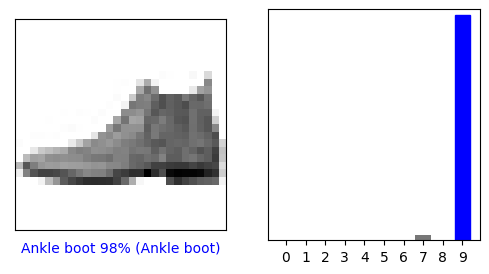

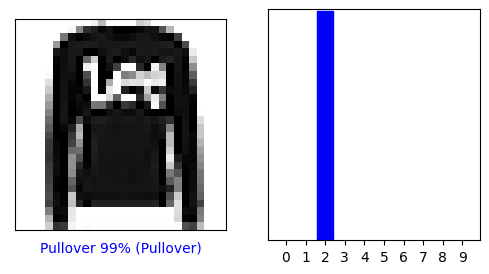

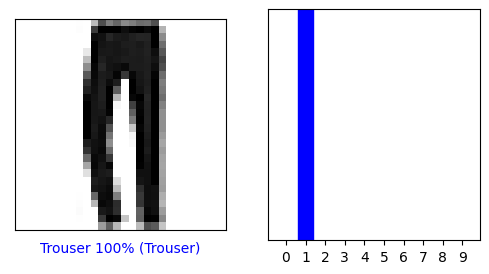

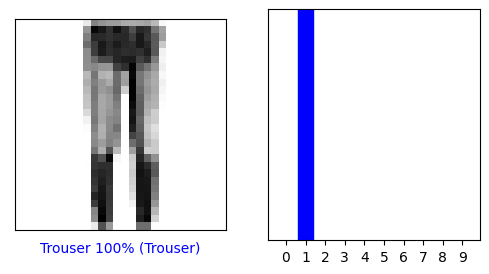

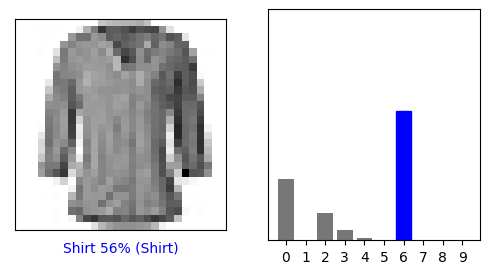

In [15]:
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, probabilities[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, probabilities[i],  test_labels)
    plt.show()

#### **Question 5: Did the model predict the 5 classes correctly? Which is the one with a lower predicted accuracy? why?**

<font color='red'>**SOLUTION**: <font color='Blue'>Blue</font> results are correct cases, red results are incorrect cases.
The one with a lower accuracy is 'Shirt'. That is because in the network also gives a some probability to the following relevant classes: 0='T-shirt/top', 2='Pullover', 4='Coat'.    
</font>

## **Exercises**

Next you will perform a manual search of the hyperparameters to fine-tune the network to find the best accuracy possible on the test set. 
Discuss in class which parameters and values seem to give a better accuracy.

1.- Change the number of epochs and evaluate the results by looking at the plots generated, e.g.: 50, 100.

2.- Change the learning rate and evaluate the results by looking at the plots generated, e.g.: 0.01, 0.0001.

3.- Change the number of units in the dense layer (not the number of outputs), and evaluate the results by looking at the plots generatede.g.: 256.

4.- Add a new Dense Layer in the model and observe the changes. Think carefully the number of units that the Dense layer will have.

#### **Which hyperparameters provided the best accuracy?**

Compare your results with other students and discuss which parameters had a bigger impact.

<font color='red'>**EXAMPLE SOLUTION:**</font>

Some parameters that work well when training this dataset with the given model are:
- Number of epochs: 100 (larger number of epochs may further increase the performance)
- Learning rate: 0.00001
- Number of units in the dense layer: 256?

Test accuracy = ~ 0.95 (95%)

Validation accuracy = ~0.84 (84%)

Test accuracy = ~0.84 (84%)

However these results are not exhaustive and there may be a better combination. How good were your results compared to this solution?